<a href="https://colab.research.google.com/github/samsyano/Microsoft-Capstone-AI-Challenge/blob/master/Appliance_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://mpp0xc0ae45ef.blob.core.windows.net/drivendata-mpp-storage/data/19/public/data-release.zip

!unzip -o data-release.zip

--2019-12-28 12:27:52--  https://mpp0xc0ae45ef.blob.core.windows.net/drivendata-mpp-storage/data/19/public/data-release.zip
Resolving mpp0xc0ae45ef.blob.core.windows.net (mpp0xc0ae45ef.blob.core.windows.net)... 52.239.154.100
Connecting to mpp0xc0ae45ef.blob.core.windows.net (mpp0xc0ae45ef.blob.core.windows.net)|52.239.154.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30080041 (29M) [application/zip]
Saving to: ‘data-release.zip’

data-release.zip    100%[===================>]  28.69M  11.9MB/s    in 2.4s    

2019-12-28 12:27:55 (11.9 MB/s) - ‘data-release.zip’ saved [30080041/30080041]

Archive:  data-release.zip
  inflating: train_labels.csv        
  inflating: test/1677_v.png         
  inflating: test/1795_c.png         
  inflating: test/1632_v.png         
  inflating: test/1919_v.png         
  inflating: test/1806_c.png         
  inflating: test/1576_v.png         
  inflating: test/1843_c.png         
  inflating: test/1768_c.png         
  i

384
576
384
576
(576, 128, 176)


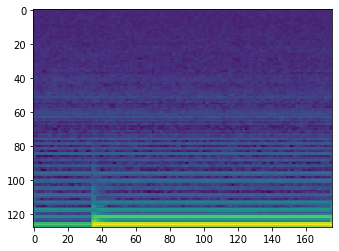

In [0]:


from __future__ import print_function
import os
from PIL import Image
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers

from keras.optimizers import rmsprop, Adam
from keras import backend as K

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense


from keras.models import Sequential
from keras.layers import Dense, Activation

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

from skimage import io as sk_io
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean


src_folder = './data'
train_folder = 'train/'
test_folder = 'test/'
# train_labels_path = './data/train_labels.csv'

test_images = []

test_images_c = []

valid_images = '_v.png'
valid_images_c = '_c.png'
resized_image = (120, 120)

train_labels = pd.read_csv('train_labels.csv')

train_images = []
train_images_c = []

def Loading_images(train_folder, images, ext):
    for filename in os.listdir(train_folder):
        
        path = os.path.join(train_folder, filename)

        img_gray = sk_io.imread(path, as_gray=True)
#     
        if img_gray is not None:
#             img_gray= rgb2gray(img_gray)
            if path.lower().endswith(ext):
                continue
            images.append(img_gray)
#             if path.lower().endswith(valid_images_c):
# #                 continue
#                 images.append(img_gray)
    return images
       


Loading_images(test_folder, test_images, valid_images)
Loading_images(train_folder, train_images, valid_images)

Loading_images(test_folder, test_images_c, valid_images_c)
Loading_images(train_folder, train_images_c, valid_images_c)

train_images =  np.asarray(train_images)
test_images = np.asarray(test_images)

train_images_c = np.asarray(train_images_c)
test_images_c = np.asarray(test_images_c)

print(len(test_images_c))
print(len(train_images_c))

print(len(test_images))
print(len(train_images))




print(train_images.shape)



train_labels.head()

plt.imshow(train_images[10])
# plt.imshow(train_images_c[10])

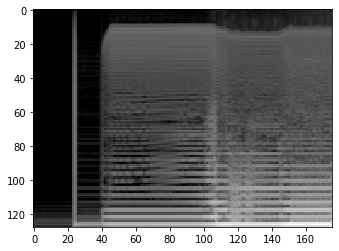

In [0]:

plt.imshow(train_images[1], cmap='gray')

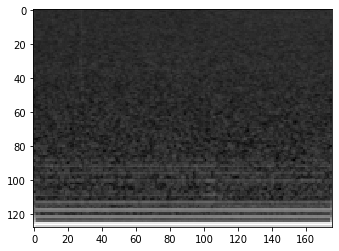

In [0]:

plt.imshow(train_images_c[1], cmap='gray')

In [0]:
print(test_images.shape)

train_images = train_images.reshape((576, 128,176, 1)).astype('float')/255
test_images = test_images.reshape((384, 128,176, 1)).astype('float')/255
print(train_images.shape)
print(train_images.dtype)

print(test_images.shape)
print(test_images.dtype)



(384, 128, 176)
(576, 128, 176, 1)
float64
(384, 128, 176, 1)
float64


In [0]:
print(test_images_c.shape)

train_images_c = train_images_c.reshape((576, 128,176, 1)).astype('float')/255
test_images_c = test_images_c.reshape((384, 128,176, 1)).astype('float')/255
print(train_images_c.shape)
print(train_images_c.dtype)

print(test_images_c.shape)
print(test_images_c.dtype)


(384, 128, 176)
(576, 128, 176, 1)
float64
(384, 128, 176, 1)
float64


In [0]:
train_labels.shape

(576, 2)

In [0]:
num_classes = 11

train_labels = train_labels['appliance']
# print(train_labels)
train_labels.shape


(576,)

In [0]:
train_labels = ku.to_categorical(train_labels, num_classes)

print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split

c_v_train_stack = np.stack((train_images_c, train_images), axis=4)

x_train, x_test, y_train, y_test = train_test_split(c_v_train_stack, train_labels, test_size = 0.25, random_state=666)

x_train_current = x_train[:,:,:,:,0]
x_test_current = x_test[:,:,:,:,0]

x_train_voltage = x_train[:,:,:,:,1]
x_test_voltage = x_test[:,:,:,:,1]


TypeError: ignored

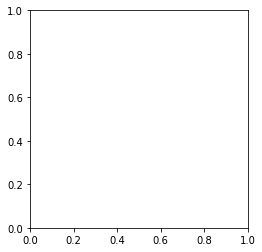

In [0]:
# defining the keras neural network
from keras.layers import Dense, Activation, Dropout, Flatten, Input, concatenate
from keras.layers.advanced_activations import LeakyReLU

batch_size = 128



# Training the multichannel CNN
input_v = Input(shape=(128,176, 1))
input_c = Input(shape=(128,176, 1))

input_shape =(128, 176, 1)

def createModel(input):
    
    conv_1 = Conv2D(64, (3,3), padding= 'same', activation='relu', input_shape=input_shape)(input)
    batch_1 = BatchNormalization(axis=-1)(conv_1)
    maxPool_1 = MaxPooling2D(pool_size=(2,2))(batch_1)
    maxPool_1 = Dropout(0.5)(maxPool_1)
    
    conv2_1 = Conv2D(128, (3, 3), padding='same', activation = 'relu')(maxPool_1)
    batch2_1 = BatchNormalization(axis=-1)(conv2_1)
    maxPool2_1 = MaxPooling2D(pool_size=(2,2))(batch2_1)
    maxPool2_1 = Dropout(0.3)(maxPool2_1)
    
    conv3_1 = Conv2D(512, (3,3), padding='same', activation = 'relu')(maxPool2_1)
    batch3_1 = BatchNormalization(axis=-1)(conv3_1)
    maxPool3_1 = MaxPooling2D(pool_size=(2,2))(batch3_1)
    maxPool3_1 = Dropout(0.5)(maxPool3_1)
   
    
    
    return maxPool2_1





In [0]:
current_input = Input(shape=input_shape)


voltage_input = Input(shape=input_shape)




current_model = createModel(current_input)

voltage_model = createModel(voltage_input)

conv_net = concatenate([current_model, voltage_model])

conv_net = Flatten()(conv_net)



from keras.models import Model



dense_out = Dense(1024, activation='relu')(conv_net)
dropOut = Dropout(0.25)(dense_out)
dense_out1 = Dense(256, activation='relu')(conv_net)
dropOut = Dropout(0.3)(dense_out1)
output = Dense(num_classes, activation='softmax')(dropOut)

model = Model([current_input, voltage_input], outputs=[output])







                
## Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
# nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metric=['accuracy'])

## Now fit the model
# nr.seed(2356)
# set_random_seed(2333)

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 128, 176, 1)  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 128, 176, 1)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 128, 176, 64) 640         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 176, 64) 640         input_8[0][0]                    
____________________________________________________________________________________________

In [0]:
from keras.callbacks import ModelCheckpoint
## Set up and call-backs for early stopping
filepath = 'my_model_file.hdf5' # define where the model is saved
callbacks_list = [
#         keras.callbacks.EarlyStopping(
#             monitor = 'val_loss', # Use accuracy to monitor the model
#             patience = 1 # Stop after one step with lower accuracy
#         ),
        keras.callbacks.ModelCheckpoint(
            filepath = filepath, # file where the checkpoint is saved
            monitor = 'val_acc', # Don't overwrite the saved model unless val_loss is worse
            save_best_only = True, # Only save model if it is the best
            mode='max'
        )
]




# history = model.fit([train_images, train_images_c], train_labels, validation_split=0.2, batch_size = 32, epochs = 4, verbose =1)        



In [0]:

history = model.fit([x_train_current, x_train_voltage], y_train,
          batch_size=64,
          epochs=20,
          callbacks=callbacks_list,
          verbose=1,
          validation_data=([x_test_current, x_test_voltage], y_test),
          shuffle=True)

Train on 432 samples, validate on 144 samples
Epoch 1/20
432/432 [==============================] - 143s 330ms/step - loss: 11.0451 - acc: 0.1944 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 2/20
432/432 [==============================] - 140s 325ms/step - loss: 12.9914 - acc: 0.1921 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 3/20
432/432 [==============================] - 138s 320ms/step - loss: 12.9840 - acc: 0.1944 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 4/20
432/432 [==============================] - 139s 321ms/step - loss: 12.9840 - acc: 0.1944 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 5/20
432/432 [==============================] - 136s 315ms/step - loss: 12.9840 - acc: 0.1944 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 6/20
432/432 [==============================] - 137s 318ms/step - loss: 12.9840 - acc: 0.1944 - val_loss: 12.8721 - val_acc: 0.2014
Epoch 7/20
432/432 [==============================] - 138s 319ms/step - loss: 12.9840 - acc: 0.1944 - val_loss: 12.8663 - val_

In [0]:
# load weights
model.load_weights(filepath)

final_loss, final_acc = model.evaluate([x_test_current, x_test_voltage], y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

144/144 [==============================] - 15s 103ms/step
Final loss: 12.872090, final accuracy: 0.201389


In [0]:
predict_df = pd.read_csv('submission_format.csv', index_col=0)


#get the predictions for the test data
predicted_classes = model.predict([test_images, test_images_c])

predict_df['appliance'] = np.argmax(predicted_classes,axis=1)


predict_df.to_csv('submission.csv')



In [0]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
# plot_loss(history)  

In [0]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
# plot_accuracy(history)   
